In [1]:
#Import library yang dibutuhkan

import keras as kerad
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#Menload dataset MNIST (Dataset disediakan dari Keras)

mnist = kerad.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
#Mencari informasi pada dataset MNIST

print('Dimensi X_train\t: ', X_train.shape)
print('Dimensi y_train\t: ', y_train.shape)
print('Dimensi X_train\t: ', X_test.shape)
print('Dimensi y_train\t: ', y_test.shape)

Dimensi X_train	:  (60000, 28, 28)
Dimensi y_train	:  (60000,)
Dimensi X_train	:  (10000, 28, 28)
Dimensi y_train	:  (10000,)


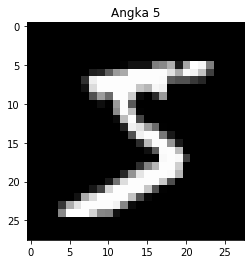

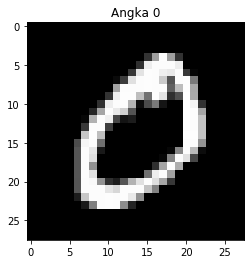

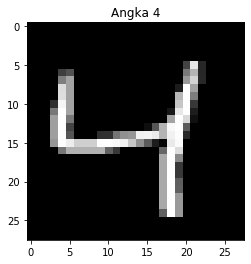

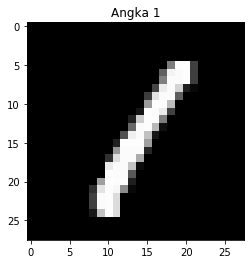

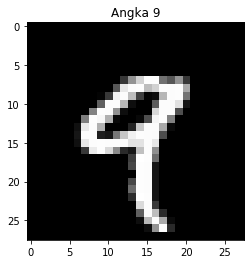

In [4]:
#Menampilkan lima gambar beserta label pada X_train

i = 0
for gambar in X_train[0:5]:
    plt.figure(figsize = [4,4])
    plt.imshow(gambar, cmap = 'gray')
    plt.title('Angka ' + str(y_train[i]))
    plt.show()
    i += 1

In [5]:
#Melakukan proses normalisasi setiap nilai pixel pada gambar

X_train = kerad.utils.normalize(X_train, axis = 1)
X_test = kerad.utils.normalize(X_test, axis = 1)

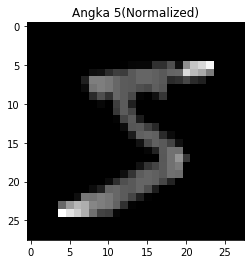

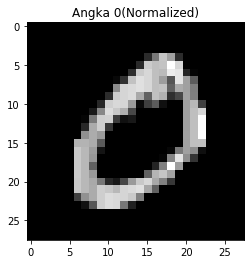

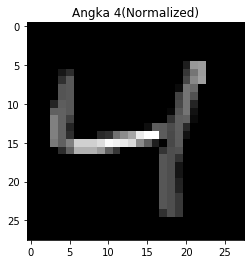

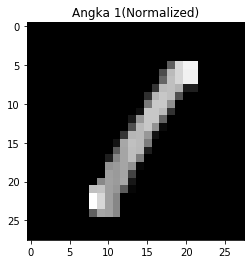

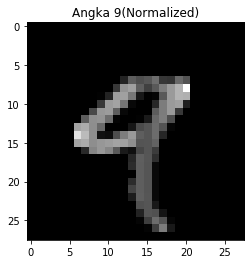

In [6]:
#Menampilkan kembali lima gambar beserta label pada X_train

i = 0
for gambar in X_train[0:5]:
    plt.figure(figsize = [4,4])
    plt.imshow(gambar, cmap = 'gray')
    plt.title('Angka ' + str(y_train[i]) + '(Normalized)')
    plt.show()
    i += 1

In [7]:
#Membuat input layer, hidden layer, fully connected layer

model = kerad.models.Sequential()
model.add(kerad.layers.Flatten())
model.add(kerad.layers.Dense(128, activation = 'relu'))
model.add(kerad.layers.Dense(128, activation = 'relu'))
model.add(kerad.layers.Dense(10, activation = "softmax"))

#Menentukan hasil output
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [8]:
#Melakukan training

model.fit(x = X_train, y = y_train, batch_size = 1000, epochs = 100, validation_data = (X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.9490 - accuracy: 0.7530 - val_loss: 0.3581 - val_accuracy: 0.8982
Epoch 2/100
60000/60000 [==============================] - 2s 32us/step - loss: 0.3045 - accuracy: 0.9112 - val_loss: 0.2580 - val_accuracy: 0.9254
Epoch 3/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.2348 - accuracy: 0.9323 - val_loss: 0.2200 - val_accuracy: 0.9352
Epoch 4/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.1964 - accuracy: 0.9433 - val_loss: 0.1898 - val_accuracy: 0.9429
Epoch 5/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.1664 - accuracy: 0.9521 - val_loss: 0.1664 - val_accuracy: 0.9499
Epoch 6/100
60000/60000 [==============================] - 2s 32us/step - loss: 0.1442 - accuracy: 0.9586 - val_loss: 0.1531 - val_accuracy: 0.9566
Epoch 7/100
60000/60000 [==============================] - 2s 

In [19]:
#Mengecek nilai loss dan nilai akurasi

nilai_loss, nilai_akurasi = model.evaluate(x = X_test, y = y_test, batch_size = 100)
print('Nilai loss sebesar\t: ', nilai_loss)
print('Tingkat akurasi sebesar\t: ', nilai_akurasi)

10000/10000 [==============================] - 0s 38us/step
Nilai loss sebesar	:  0.14911949627332433
Tingkat akurasi sebesar	:  0.973800003528595


In [20]:
#Menyimpan model hasil traning

model.save('MNIST.model')

In [ ]:
#Menload model sebelumnya yang telah dibuat
#Model = kerad.models.load_model('MIST.model')

In [24]:
#Membuat dict label untuk gambar

label = {
    0 : 'Nol',
    1 : 'Satu',
    2 : 'Dua',
    3 : 'Tiga',
    4 : 'Empat',
    5 : 'Lima',
    6 : 'Enam',
    7 : 'Tujuh',
    8 : 'Delapan',
    9 : 'Sembilan'
}

Dimensi prediksi	:  (10000, 10)


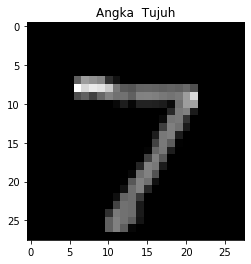

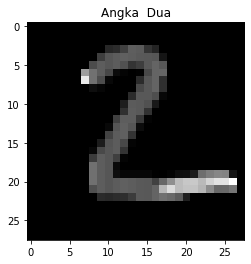

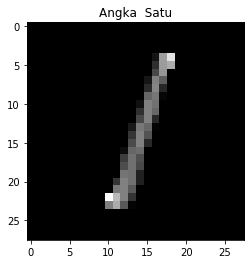

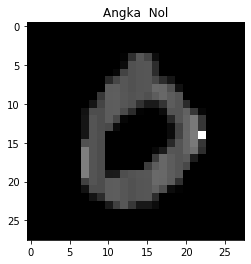

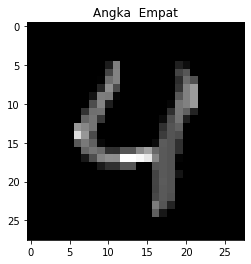

In [33]:
# Melakukan prediksi pada Lima gambar pertama di dalam X_test

prediksi = model.predict(x = X_test)
print('Dimensi prediksi\t: ',np.array(prediksi).shape)
i = 0
for gambar in X_test[0:5]:
    label_prediksi = np.argmax(prediksi[i])
    plt.figure(figsize = [4,4])
    plt.imshow(gambar, cmap = 'gray')
    plt.title('Angka  ' + str(label[label_prediksi]))
    plt.show()
    i += 1
    